In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
import csv
with open("/home/aditi/document-information-retrieval/wikilink_ner.csv", "r") as f:
    reader = csv.reader(f)
    i = next(reader)
    print(i)

['Mention', ' DBpedia Uri', ' NIF Uri', ' Type']


In [4]:
# Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import numpy as np
from collections import Counter

stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

# Cleaning the text sentences so that punctuation marks, stop words & digits are removed  
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    processed = re.sub(r"\d+","",normalized)
    y = processed.split()
    return y

import nltk.data

data = []
corpus = []
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
fp = open("sentences.txt")
for line in fp:
    line = line.strip()
    cleaned = clean(line)
    data.append(cleaned)

corpus = [' '.join(i) for i in data]
#print(corpus)

#Count Vectoriser then tidf transformer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape) 
type(tfidf)

(30, 251)


scipy.sparse.csr.csr_matrix

In [6]:
times = []
algorithm = ['K-means', 'Agglomerative', 'Spectral']
start_time = time.time()
from sklearn.cluster import KMeans

num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
print(km.labels_)
clusters = km.labels_.tolist()
elapsed_time = time.time() - start_time
times.append(elapsed_time)

print("Time taken for K-means Clustering: ", elapsed_time)

# ====================================================================
#   Modification-1 : Implement Agglomerative Heirarchical Clustering
# ====================================================================

start_time = time.time()
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit(tfidf.toarray())
print(cluster.labels_)

elapsed_time = time.time() - start_time
times.append(elapsed_time)

print("Time taken for Agglomerative Clustering: ", elapsed_time)
type(cluster.labels_)

# =========================================================
#   Modification-2 : Implement Spectral Clustering
# =========================================================

start_time = time.time()
from sklearn.cluster import SpectralClustering 

# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors') 

# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(tfidf.toarray()) 
print(labels_rbf)

elapsed_time = time.time() - start_time
times.append(elapsed_time)

print("Time taken for Spectral Clustering: ", elapsed_time)
type(cluster.labels_)

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 0]
Time taken for K-means Clustering:  1.127117395401001
[1 1 1 1 1 1 1 1 1 1 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Time taken for Agglomerative Clustering:  0.10764503479003906
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
Time taken for Spectral Clustering:  0.5962066650390625


numpy.ndarray

In [7]:
# =======================================================================
#   Modification-3 : Implemented Silhouette Analysis to get best cluster
# =======================================================================


from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
def getCluster(n):
    km = KMeans(n_clusters=n)
    km.fit(tfidf)
    clusters = km.labels_
    runSilhoutteAnalysis(tfidf, clusters, n)
    
def runSilhoutteAnalysis(X, cluster, n):
    sil_avg = silhouette_score(X, cluster)
    print('For number of clusters:', n,',average Silhouette Score:', str(sil_avg))
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster)
    
for cluster in [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13]:
    getCluster(cluster)

For number of clusters: 2 ,average Silhouette Score: 0.030369886188607167
For number of clusters: 3 ,average Silhouette Score: 0.0415726449734021
For number of clusters: 4 ,average Silhouette Score: 0.05810545532468503
For number of clusters: 5 ,average Silhouette Score: 0.05513626562733793
For number of clusters: 6 ,average Silhouette Score: 0.04393264055788708
For number of clusters: 7 ,average Silhouette Score: 0.06083926013790073
For number of clusters: 8 ,average Silhouette Score: 0.05330135484023437
For number of clusters: 10 ,average Silhouette Score: 0.07146135578128995
For number of clusters: 11 ,average Silhouette Score: 0.06732478747285929
For number of clusters: 12 ,average Silhouette Score: 0.05784648938780677
For number of clusters: 13 ,average Silhouette Score: 0.06910901652237274


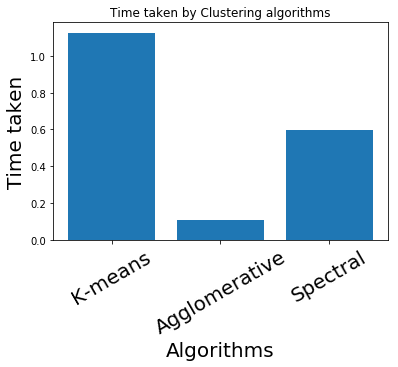

In [8]:
import matplotlib.pyplot as plt
def plot_bar_x():
    index = np.arange(len(algorithm))
    plt.bar(index, times)
    plt.xlabel('Algorithms', fontsize=20)
    plt.ylabel('Time taken', fontsize=20)
    plt.xticks(index, algorithm, fontsize=20, rotation=30)
    plt.title('Time taken by Clustering algorithms')
    plt.show()
plot_bar_x()

In [9]:
import pandas as pd
idea = {'Idea':corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame = pd.DataFrame(idea,index=[clusters], columns=['Idea','Cluster']) # Converting it into a dataframe.

In [10]:
print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.



                                                Idea  Cluster
1  cricket bat ball game played two team eleven p...        1
1  phase play called inning one team bat attempti...        1
1  team one two inning apiece and first inning en...        1
1  match begin two team captain meet pitch toss c...        1
1  two batsman eleven fielder enter field play be...        1
1  common dismissal cricket match bowled bowler h...        1
1  run scored two main method either hitting ball...        1
1             main objective team score run opponent        1
1  team batting last scored fewer run opponent sa...        1
1  role striker batsman prevent ball hitting stum...        1
2  artificial intelligence intelligence exhibited...        2
2  field ai research defines study intelligent ag...        2
2  overall research goal artificial intelligence ...        2
2  natural language processing give machine abili...        2
0  ai researcher developed sophisticated mathemat...        0
2  int

In [11]:
result = {}

for i in range(len(clusters)):
    if clusters[i] in result:
        result[clusters[i]].append(i)
    else:
        temp = [i]
        result[clusters[i]] = temp
        
print(result)

# =================================
# Call DCI_Closed for each cluster
# =================================
# d1 -> word1, word2, word3
# d2 -> word2, word3
# ...

{0: [14, 20, 21, 22, 23, 25, 26, 27, 28, 29], 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2: [10, 11, 12, 13, 15, 16, 17, 18, 19, 24]}


In [292]:
# ===========================================================
#       Step 1 : Create vertical database into memory
# ===========================================================
file = open("database.txt", "r")
verticalDatabase = open("vdb.txt", "w+")

# Use a dictionary for HashMap<Integer, Set<Integer>>
# We mapped items to transactions they appear in

maxItemId = 0
tidCount = 1
database = {}      # Dictionary for hashing (int -> list(int))

for line in file:
    items = line.split()
    print(items)
    for i in items:
        item = int(i)
        maxItemId = max(maxItemId, item)
        if item in database:
            database[item].append(tidCount)
        else:
            database.update({item: [tidCount]})
    tidCount += 1
    
print(database)
print(maxItemId)
file.close()

['2', '4']
['1', '2', '3', '4']
['1', '2', '3']
['3']
{1: [2, 3], 2: [1, 2, 3], 3: [2, 3, 4], 4: [1, 2]}
4


In [293]:
# ========================================================
# Calculating TF-IDF values of all words in each sentence
# ========================================================
from sklearn.feature_extraction.text import TfidfTransformer
 
docs = idea['Idea']
tf = TfidfVectorizer(input=docs, analyzer='word', min_df = 0, stop_words = 'english', sublinear_tf=True)
tfidf_matrix =  tf.fit_transform(corpus)
feature_names = tf.get_feature_names()

tfidf_values = []
for doc in range(0, len(docs)):
    feature_index = tfidf_matrix[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
    currSentence = []
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        currSentence.append((w, s))
    tfidf_values.append(currSentence)

# tfidf_values = list of list of tuples of the form (word, TF-IDF score)
tfidf_values[0]

[('cricket', 0.5546549432332832),
 ('bat', 0.27741674773179725),
 ('ball', 0.2595098011369835),
 ('game', 0.36741142246757896),
 ('played', 0.36741142246757896),
 ('team', 0.23125473575543234),
 ('player', 0.36741142246757896),
 ('field', 0.2993330791115057)]

In [315]:
# ========================================================
#         Run DCI_Closed for every cluster
# ========================================================

# Store vertical database for each cluster, access through hD[i]
horizontalDatabase = []

# Iterating through all clusters
for i in range(0, len(result)):
    currentCluster = {}
    for j in range(0, len(result[i])):   # j = document number
        document = result[i][j]          # document id  
        for k in range(0, len(tfidf_values[document])):
            if tfidf_values[document][k][0] in currentCluster:
                currentCluster[tfidf_values[document][k][0]].append(document)
            else:
                temp = [document]
                currentCluster[tfidf_values[document][k][0]] = temp    
    horizontalDatabase.append(currentCluster)
print(len(horizontalDatabase))
type(horizontalDatabase[0])
horizontalDatabase

3


dict

In [295]:
# ====================================================================
#       Step 2: Initialise variables for first call to DCI_Closed
# ====================================================================
frequentPatterns = {}
closedSet = []
preSet = []
postSet = []
closedSetTids = set()
closedCount = 0
# [Changeable] User-defined minimum support threshold value
minSupport = 2
clusterId = 1

for c in range(0, len(horizontalDatabase)):
    clusterId = c
    # =============================
    # Step 2-1: Creating postSet
    # =============================
    maxItemId = len(horizontalDatabase[clusterId])

    for i in horizontalDatabase[clusterId]:
    #     print(i)
        tidSet = horizontalDatabase[clusterId].get(i, None)
        if (tidSet != None and len(tidSet) >= minSupport):
            postSet.append(i)

    # print(postSet)

    # =============================================================
    # Step 2-2: Sort postSet by ascending + lexicographical order
    # =============================================================
    def bySuppLex(item1, item2):
        if(horizontalDatabase[clusterId].get(item1) == None):
            return -1
        if(horizontalDatabase[clusterId].get(item2) == None):
            return 1
        size1 = len(horizontalDatabase[clusterId].get(item1))
        size2 = len(horizontalDatabase[clusterId].get(item2))
        if(size1 == size2):
            if item1 < item2:
                return -1
            else:
                return 1
        return size1 - size2

    def cmp_to_key(myCompare):
        class K:
            def __init__(self, obj, *args):
                self.obj = obj
            def __lt__(self, other):
                return myCompare(self.obj, other.obj) < 0
            def __gt__(self, other):
                return myCompare(self.obj, other.obj) > 0
            def __eq__(self, other):
                return myCompare(self.obj, other.obj) == 0
            def __le__(self, other):
                return myCompare(self.obj, other.obj) <= 0
            def __ge__(self, other):
                return myCompare(self.obj, other.obj) >= 0
            def __ne__(self, other):
                return myCompare(self.obj, other.obj) != 0
        return K

    # sort modifies the list which is called, sorted returns 
    # sorted copy without changing original list

    postSet.sort(key = cmp_to_key(bySuppLex))
    # print(postSet)
    # print("preset: ", preSet)

    # ==========================================
    #  Step 3-4: DCI_Closed function
    # ==========================================    
    def dci_closed(firstTime, closedSet, closedSetTids, postSet, preSet):
        global closedCount
        for i in postSet:
                newGenTids = set()
                if(firstTime):
                    if(horizontalDatabase[clusterId].get(i) != None):  
                        newGenTids = set(horizontalDatabase[clusterId].get(i))
                else:
                    newGenTids = intersectTidSet(closedSetTids, set(horizontalDatabase[clusterId].get(i)))    
                if len(newGenTids) >= minSupport:
                    newGen = []
                    newGen = closedSet.copy()
                    newGen.append(i)
                    if(isDup(newGenTids, preSet) == False):
                        closedSetNew = []
                        closedSetNew = newGen.copy()
                        closedSetNewTIDs = set()
                        if firstTime:
                            closedSetNewTIDs = set(horizontalDatabase[clusterId].get(i))
                        else:
                            for i in newGenTids:
                                closedSetNewTIDs.add(i)      # Checkpoint
                        postSetNew = []
                        for j in postSet:
                            if smallerAccToTotalOrder(i, j):
                                if set(newGenTids).issubset(horizontalDatabase[clusterId].get(j)):
                                    closedSetNew.append(j)
                                    jTIDs = set(horizontalDatabase[clusterId].get(j))
                                    it = iter(closedSetNewTIDs)
                                    while it:
                                        try:
                                            tid = next(it)
                                            if tid in jTIDs == False:
                                                closedSetNewTIDs.remove(tid)
                                        except StopIteration as e:
                                            print(e)
                                            break
                                else:
                                    postSetNew.append(j)
                        # Uncomment to print FP with support
                        # print(closedSetNew, len(closedSetNewTIDs))
                        if clusterId in frequentPatterns:
                            frequentPatterns[clusterId].append(closedSetNew)
                        else:
                            temp = [closedSetNew]
                            frequentPatterns[clusterId] = temp  
                        
                        #frequentPatterns.append(closedSetNew)
                        closedCount = closedCount + 1
                        preSetNew = preSet
                        dci_closed(False, closedSetNew, closedSetNewTIDs, postSetNew, preSetNew)
                        preSet.append(i)  

    dci_closed(True, closedSet, closedSetTids, postSet, preSet)
print(closedCount)
print(frequentPatterns)












































































68
{0: [['action', 'agent', 'chance', 'environment', 'maximize', 'perceives', 'intelligent', 'success'], ['artificial', 'intelligence', 'machine'], ['goal', 'intelligent', 'research'], ['learning', 'machine'], ['natural'], ['science'], ['solve', 'ai'], ['technique', 'computer'], ['technology', 'computer'], ['computer'], ['computer', 'machine', 'machine'], ['human'], ['human', 'intelligence', 'intelligence', 'machine'], ['human', 'machine', 'intelligence', 'machine'], ['intelligence', 'machine'], ['intelligent'], ['research'], ['research', 'success', 'success', 'ai'], ['research', 'ai', 'success', 'ai'], ['success'], ['success', 'ai', 'ai'], ['ai'], ['machine']], 1: [['called', 'cloud', 'consists', 'nucleus', 'electron'], ['cloud', 'consists', 'nucleus', 'electron'], ['compound', 'chemical', 'property'], ['consists', 'nucleus', 'electron'], ['nucleus', 'electron'], ['chemistry', 'atom'], ['chemistry', 'atom', 'pr

In [64]:
# ============================================
#       For numerical data (dummy data)
# ============================================


# ====================================================================
#       Step 2: Initialise variables for first call to DCI_Closed
# ====================================================================
closedSet = []
preSet = []
postSet = []
closedSetTids = set()
closedCount = 0
# [Changeable] User-defined minimum support threshold value
minSupport = 1

# =============================
# Step 2-1: Creating postSet
# =============================
for i in range (1, maxItemId + 1):
    tidSet = database.get(i, None)
    if (tidSet != None and len(tidSet) >= minSupport):
        postSet.append(i)
        
print(postSet)

# =============================================================
# Step 2-2: Sort postSet by ascending + lexicographical order
# =============================================================
def bySuppLex(item1, item2):
    size1 = len(database.get(item1))
    size2 = len(database.get(item2))
    if(size1 == size2):
        if item1 < item2:
            return -1
        else:
            return 1
    return size1 - size2

def cmp_to_key(myCompare):
    class K:
        def __init__(self, obj, *args):
            self.obj = obj
        def __lt__(self, other):
            return myCompare(self.obj, other.obj) < 0
        def __gt__(self, other):
            return myCompare(self.obj, other.obj) > 0
        def __eq__(self, other):
            return myCompare(self.obj, other.obj) == 0
        def __le__(self, other):
            return myCompare(self.obj, other.obj) <= 0
        def __ge__(self, other):
            return myCompare(self.obj, other.obj) >= 0
        def __ne__(self, other):
            return myCompare(self.obj, other.obj) != 0
    return K

# sort modifies the list which is called, sorted returns 
# sorted copy without changing original list

postSet.sort(key = cmp_to_key(bySuppLex))
print(postSet)
print("preset: ", preSet)

# ==========================================
#  Step 3-4: DCI_Closed function
# ==========================================    
def dci_closed(firstTime, closedSet, closedSetTids, postSet, preSet):
    global closedCount
    for i in postSet:
            newGenTids = set()
            if(firstTime):
                newGenTids = set(database.get(i))
            else:
                newGenTids = intersectTidSet(closedSetTids, set(database.get(i)))    
            if len(newGenTids) >= minSupport:
                newGen = []
                newGen = closedSet.copy()
                newGen.append(i)
                if(isDup(newGenTids, preSet) == False):
                    closedSetNew = []
                    closedSetNew = newGen.copy()
                    closedSetNewTIDs = set()
                    if firstTime:
                        closedSetNewTIDs = set(database.get(i))
                    else:
                        for i in newGenTids:
                            closedSetNewTIDs.add(i)      # Checkpoint
                    postSetNew = []
                    for j in postSet:
                        if smallerAccToTotalOrder(i, j):
                            if set(newGenTids).issubset(database.get(j)):
                                closedSetNew.append(j)
                                jTIDs = set(database.get(j))
                                it = iter(closedSetNewTIDs)
                                while it:
                                    try:
                                        tid = next(it)
                                        if tid in jTIDs == False:
                                            closedSetNewTIDs.remove(tid)
                                    except StopIteration as e:
                                        print(e)
                                        break
                            else:
                                postSetNew.append(j)
                    print(closedSetNew, len(closedSetNewTIDs))
                    closedCount = closedCount + 1
                    preSetNew = preSet
                    dci_closed(False, closedSetNew, closedSetNewTIDs, postSetNew, preSetNew)
                    preSet.append(i)  
    
dci_closed(True, closedSet, closedSetTids, postSet, preSet)
print(closedCount)

[1, 2, 3, 4]
[1, 4, 2, 3]
preset:  []


[1, 2, 3] 2
[1, 2, 3, 4] 1
[3] 3
3


In [296]:
# ===================================================================
#        Step 3: Calling DCI_Closed recursive procedure
# ===================================================================

# ==========================================
#  Step 3-1: Find intersection of two sets
# ==========================================
def intersectTidSet(tidSet1, tidSet2):
    tidSet = set()
    if(len(tidSet1) > len(tidSet2)):
        for tid in tidSet2:
            if tid in tidSet1:
                tidSet.add(tid)
    else:
        for tid in tidSet1:
            if tid in tidSet2:
                tidSet.add(tid)
    return tidSet

# =====================================================
#  Step 3-2: Check if newGenTids is already duplicated
# =====================================================
    
def isDup(newGenTids, preSet):
    for j in preSet: 
        if(horizontalDatabase[clusterId].get(j) == None):
            return False
        if set(newGenTids).issubset(horizontalDatabase[clusterId].get(j)):          # Checkpoint
            return True
    return False

# =====================================================
#  Step 3-3: Check if item is smaller by support + lex
# =====================================================
def smallerAccToTotalOrder(i, j):
    if(horizontalDatabase[clusterId].get(i) == None):
        return True
    if(horizontalDatabase[clusterId].get(j) == None):
        return False
    size1 = len(horizontalDatabase[clusterId].get(i))
    size2 = len(horizontalDatabase[clusterId].get(j))
    if size1 == size2:
        if i < j:
            return True
        else:
            return False
    return size2 - size1 > 0


In [301]:
# ======================================
#  Step 4: Query Resolution
# ======================================
query = ['bat', 'run']
clusterScore = []

# ===================================================================
#  Step 4-1: Picking best cluster: Calculate similarity with clusters
# ===================================================================

def intersection(list1, list2):
    return list(set(list1) & set(list2))

for i in frequentPatterns:
    ithCluster = frequentPatterns[i]
    currScore = 0
    for j in range(0, len(ithCluster)):
        if(len(intersection(ithCluster[j], query)) != 0):
            currScore+=1
    clusterScore.append(currScore)
print(clusterScore)

maxScore = max(clusterScore)
clusterWithMaxScore = clusterScore.index(maxScore)
print("Cluster", clusterWithMaxScore+1, "has maximum number of matches with ", maxScore, "matches.\n")

# ======================================================================
#  Step 4-2: Picking best documents: Calculate similarity with documents
# ======================================================================

print(clusterWithMaxScore)
print("***************************************")
print("Retrieved documents are as follows:")
print("***************************************")
for i in range(0, len(idea['Cluster'])):
    if(idea['Cluster'][i] == clusterWithMaxScore):
        print(i, idea['Idea'][i])

[0, 0, 15]
Cluster 3 has maximum number of matches with  15 matches.

2
***************************************
Retrieved documents are as follows:
***************************************
0 cricket bat ball game played two team eleven player cricket field
1 phase play called inning one team bat attempting score many run possible
2 team one two inning apiece and first inning end team swap role next inning
3 match begin two team captain meet pitch toss coin determine team bat first
4 two batsman eleven fielder enter field play begin member fielding team known bowler delivers ball
5 common dismissal cricket match bowled bowler hit stump directly ball dislodges bail batsman get out
6 run scored two main method either hitting ball hard enough cross boundary two batsman swapping end
7 main objective team score run opponent
8 team batting last scored fewer run opponent said lost n run
9 role striker batsman prevent ball hitting stump using bat and simultaneously strike well enough score run


In [322]:
!pip install pyfpgrowth
import pyfpgrowth

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [335]:
# ============================================================
#   Modification-4 : Implemented FP-Growth algorithm
# ============================================================


test = idea['Idea'][24:29]
patterns = pyfpgrowth.find_frequent_patterns(test, 4)

KeyboardInterrupt: 